# Fitt's experiment analysis

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

Those datas were retrieved from [this github](https://github.com/hadzinikolicmasa/SMPE/tree/main/Homework%20week%206/data) to make another possible analysis on them.
Let's first import them !

In [2]:
right_hand = pandas.read_csv("data/20231122_1546_computerRightHand_RawData.csv")
left_hand = pandas.read_csv("data/20231122_1600_computerLeftHand_RawData.csv")
both_hands = pandas.read_csv("data/20231122_1618_phoneTwoHands_RawData.csv")

We are interested in Fitt's law, so let's first remove some obvious outliers we had in the data.

In [3]:
both_hands = both_hands[both_hands['MT'] != 0]
left_hand = left_hand[left_hand['MT'] != 0]
right_hand = right_hand[right_hand['MT'] != 0]
left_hand

,A,W,MT,ID
0,80,8,1748,3
1,80,8,1659,3
2,80,8,1283,3
3,80,8,1318,3
4,80,8,1411,3
5,20,8,1483,2
6,20,8,1851,2
7,20,8,1777,2
8,20,8,1403,2
9,20,8,1284,2


## Plotting fitts law

We can firstly basically plot $MT$ as a function of $ID$.

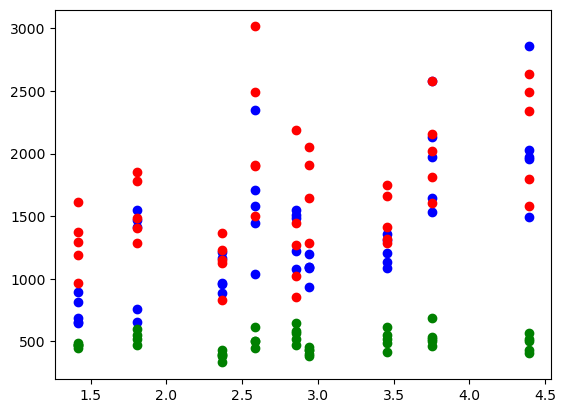

In [4]:
plt.plot(np.log2(right_hand['A']/right_hand['W'] + 1), right_hand['MT'], 'bo')
plt.plot(np.log2(left_hand['A']/left_hand['W'] + 1), left_hand['MT'], 'ro')
plt.plot(np.log2(both_hands['A']/both_hands['W'] + 1), both_hands['MT'], 'go')

We can see a tendency, maybe we can model it using linear regression.

In [5]:
rightregress = scipy.stats.linregress(np.log2(right_hand['A']/right_hand['W'] + 1), right_hand['MT'])
leftregress = scipy.stats.linregress(np.log2(left_hand['A']/left_hand['W'] + 1), left_hand['MT'])
bothregress = scipy.stats.linregress(np.log2(both_hands['A']/both_hands['W'] + 1), both_hands['MT'])

print("Right hand - Slope : %.2f | Intercept : %.2f" % (rightregress.slope, rightregress.intercept))
print("Left hand - Slope : %.2f | Intercept : %.2f" % (leftregress.slope, leftregress.intercept))
print("Both hands - Slope : %.2f | Intercept : %.2f" % (bothregress.slope, bothregress.intercept))

Right hand - Slope : 384.88 | Intercept : 269.70
Left hand - Slope : 251.86 | Intercept : 940.72
Both hands - Slope : 12.97 | Intercept : 452.86


Let's plot linear regression along with the raw datas.

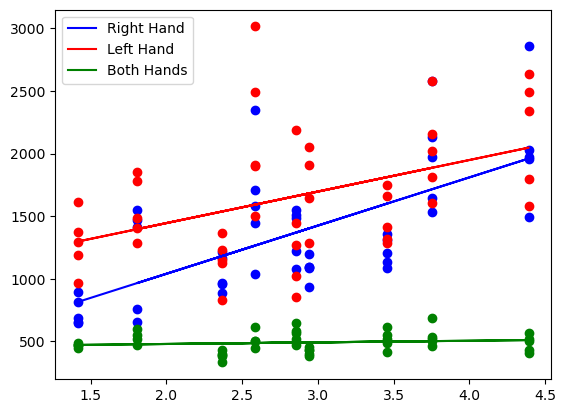

In [6]:
plt.plot(np.log2(right_hand['A']/right_hand['W'] + 1), right_hand['MT'], 'bo')
plt.plot(np.log2(left_hand['A']/left_hand['W'] + 1), left_hand['MT'], 'ro')
plt.plot(np.log2(both_hands['A']/both_hands['W'] + 1), both_hands['MT'], 'go')
plt.plot(np.log2(right_hand['A']/right_hand['W'] + 1), rightregress.slope*np.log2(right_hand['A']/right_hand['W'] + 1)+rightregress.intercept, color='blue', label='Right Hand')
plt.plot(np.log2(left_hand['A']/left_hand['W'] + 1), leftregress.slope*np.log2(left_hand['A']/left_hand['W'] + 1)+leftregress.intercept, color='red', label='Left Hand')
plt.plot(np.log2(both_hands['A']/both_hands['W'] + 1), bothregress.slope*np.log2(both_hands['A']/both_hands['W'] + 1)+bothregress.intercept, color='green', label='Both Hands')
plt.legend()

On touchscreen, the MT doesn't seem to depend on the ID. However, there are no movement involved with touchscreen compared to mouses so this could be expected.
Thanks to the linear regression, we can see the tendency between MT and ID, however, due to the variance and the error around the regression, it is hard to conclude about the exactitude of the law.

Experimental setup must also be taken into account (noise around, ...)